
#**Atividade 1**
# Aprendizado de máquina e inteligência artificial em física

Considere a base de dados contida no arquivo Stars.csv, disponível para download na página da disciplina no Moodle, sobre as características observadas de um conjunto de 240 estrelas.



# **Definindo Bibliotecas**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score

#**1. Preparando os dados para o processamento**

In [ ]:
# Carregando o arquivo Stars.csv em um DataFrame
# O arquivo em questão encontra-se na mesma pasta do google drive que o script

drive.mount('/content/drive')
diretorio = '/content/drive/MyDrive/ML/Atividade1/Stars.csv'
data = pd.read_csv(diretorio)

Mounted at /content/drive


**Visualização rápida dos dados**

In [ ]:
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


# Conversão de dados categóricos em numérico

Pode-se perceber que os dados referente à cor (Coluna Color) e à classe (Coluna Spectral_Class) são strings. Precisamos convertê-los para valores numéricos. Para isso existem alguns mecanismos. Sabe-se que as cores de estrelas bem como sua classe estão relacionados à temperatura de forma que "Azul" e "O" configura uma estrela com temperatura bem alta enquanto que "'Vermelho" e "M" estão relacionados
à estrelas mais frias


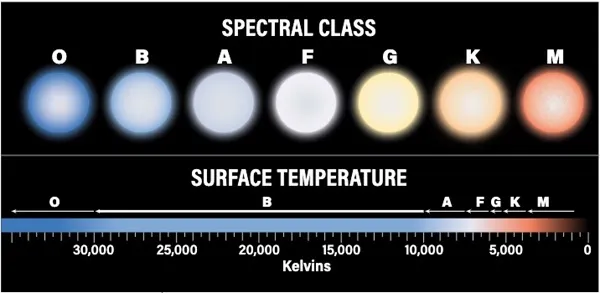

[1](https://www.astronomy.com/wp-content/uploads/sites/2/2023/02/ScreenShot20210420at3.19.16PM.jpg?resize=600%2C293)



In [ ]:
# Mapeando de forma personalizada as cores para números

color_scaling = {
    'Blue': 6,
    'Blue White': 5,
    'Blue white': 5,
    'Blue-White': 5,
    'Blue-white': 5,
    'White': 4,
    'Whitish': 4,
    'white': 4,
    'White-Yellow': 3.5,
    'yellow-white': 3.5,
    'Yellowish White': 3.5,
    'Yellowish': 3,
    'yellowish': 3,
    'Orange': 2,
    'Pale yellow orange': 2.5,
    'Orange-Red': 1,
    'Red': 0
}

# Adicionando o mapeamento aos dados 'Color'
data['Color'] = data['Color'].map(color_scaling)


# Mapeando de forma personalizada o Spectral_Color para números
# Ordem O > B > A > F > G > K > M
sc_scaling = {
    'O': 7,
    'B': 6,
    'A': 5,
    'F': 4,
    'G': 3,
    'K': 2,
    'M': 1,
}

# Adicionando o mapeamento aos dados 'Spectral_Class'
data['Spectral_Class'] = data['Spectral_Class'].map(sc_scaling)

Visualizando os dados modificados

In [ ]:
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0.0,1,0
1,3042,0.000500,0.1542,16.60,0.0,1,0
2,2600,0.000300,0.1020,18.70,0.0,1,0
3,2800,0.000200,0.1600,16.65,0.0,1,0
4,1939,0.000138,0.1030,20.06,0.0,1,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,6.0,7,5
236,30839,834042.000000,1194.0000,-10.63,6.0,7,5
237,8829,537493.000000,1423.0000,-10.73,4.0,5,5
238,9235,404940.000000,1112.0000,-11.23,4.0,5,5


# Correlação entre os dados

<Axes: >

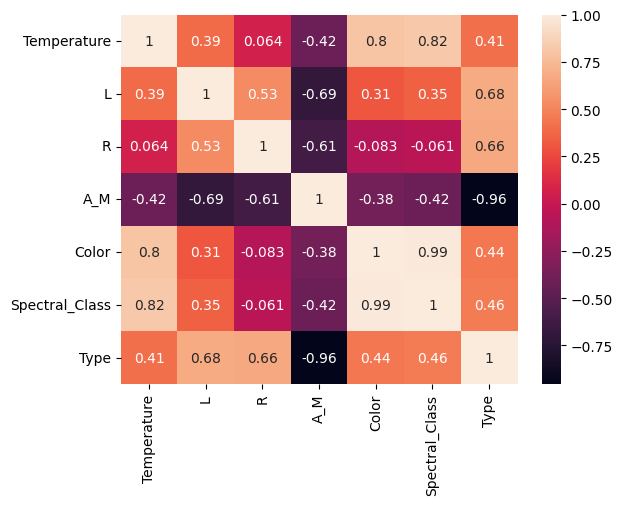

In [ ]:
# Calcular a correlação entre as colunas numéricas
corr = data.corr()

#plot
sns.heatmap(corr,annot=True)

Matriz de gráficos de dispersão colorido de acordo com os dados da variável 'Type'.

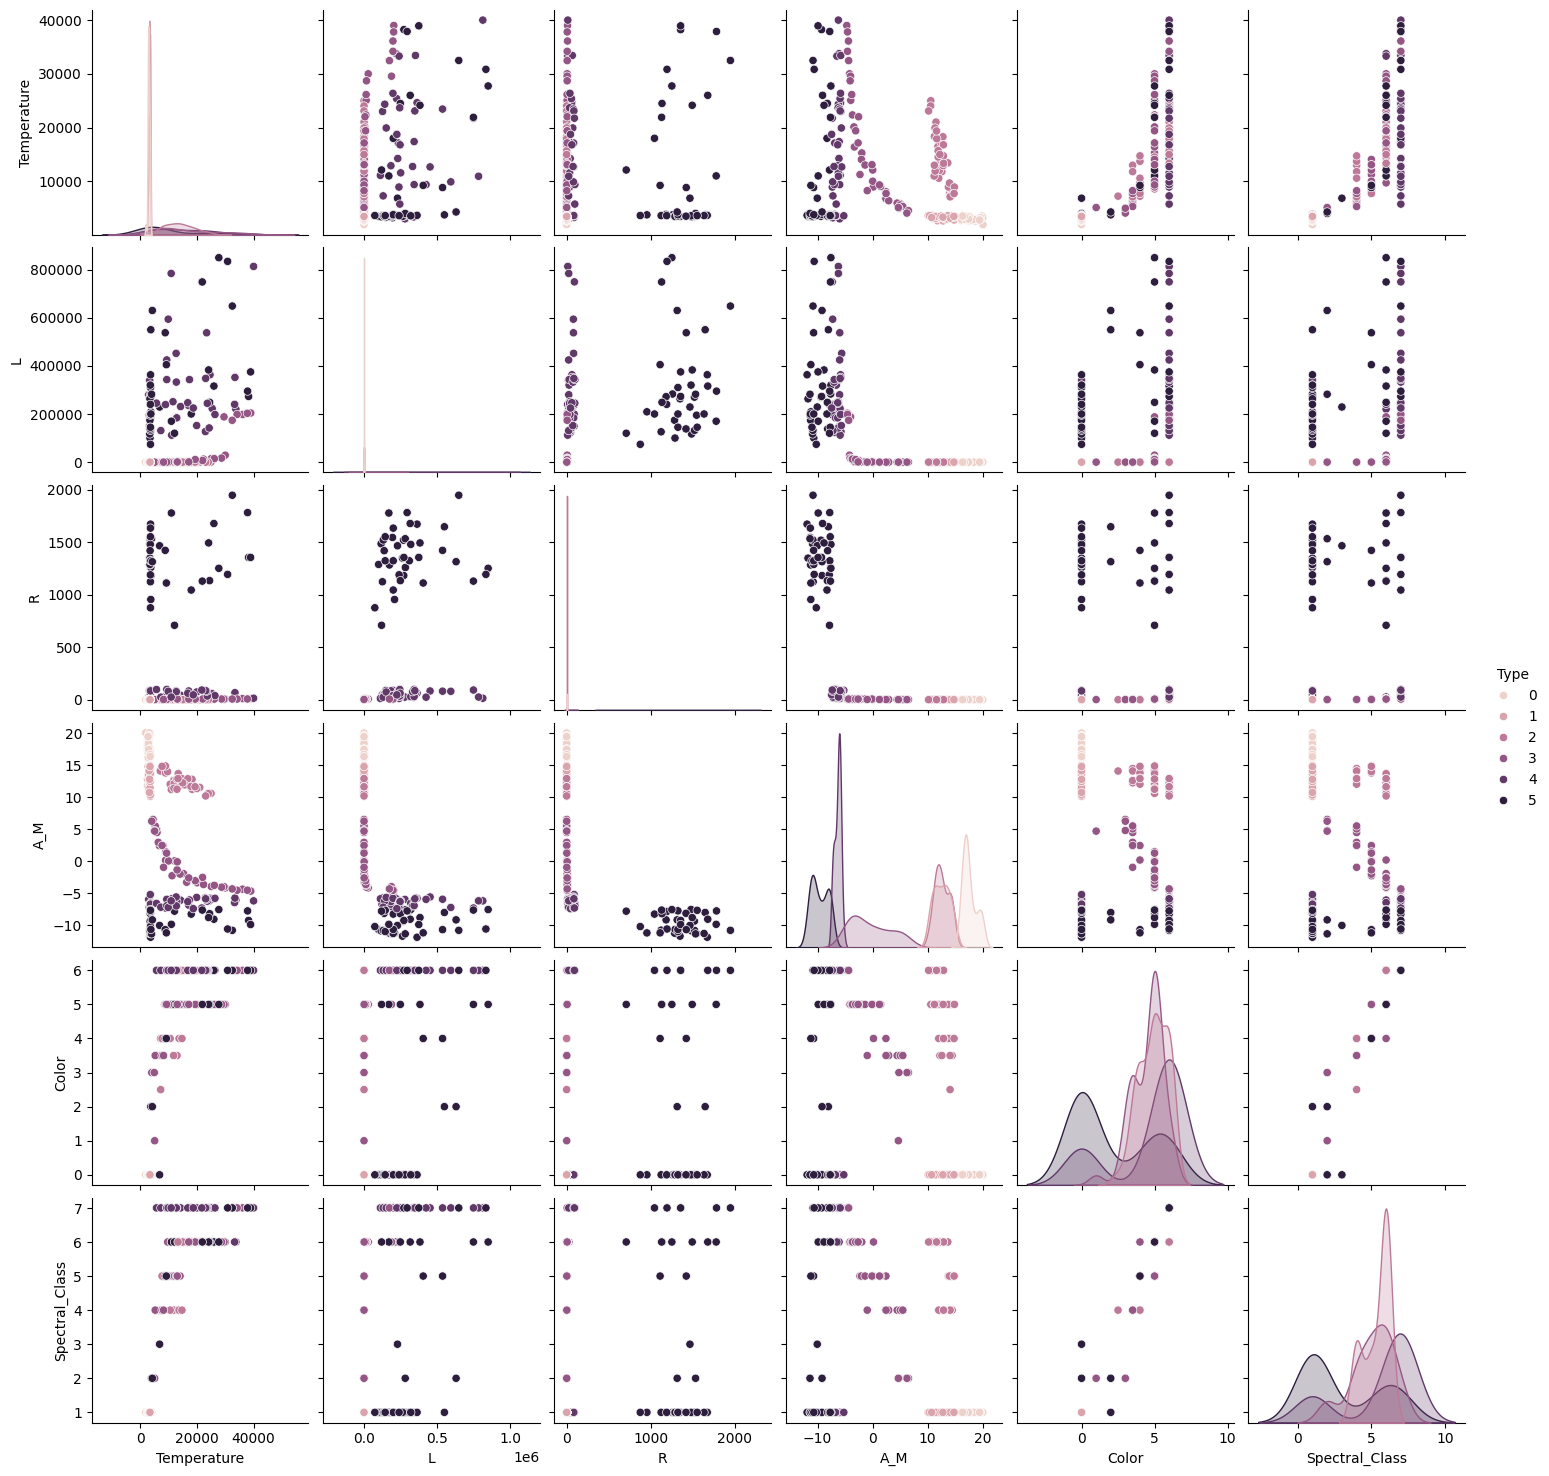

In [ ]:
sns.pairplot(data=data,hue="Type")
# fonte: https://www.kaggle.com/code/devchauhan1/star-type-classification-nasa/notebook

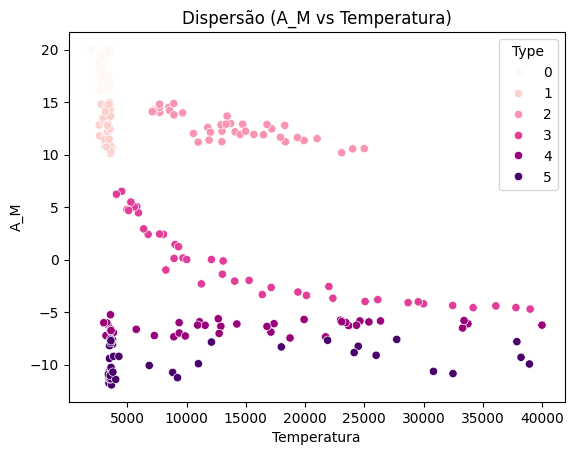

In [ ]:
sns.scatterplot(data=data, x='Temperature', y='A_M', hue='Type', palette='RdPu')
plt.ylabel('A_M')
plt.xlabel('Temperatura')
plt.title('Dispersão (A_M vs Temperatura)')
plt.show()


# **2. Reescalonando os dados**



As operações de transformação de dados visam a atender a
adequação dos mesmos aos métodos numéricos e aos
algoritmos(aula 4), para isso é importante que os dados estejam
na mesma escala.

Um dos métodos de escalonamento discutido em aula foi **normalização**, que ajustar a escala dos dados (MinMax, Z-score). Iremos empregar nesta atividade o método **StandardScaler**.

Esse método utiliza a distribuição normal e transforma cada valor nos dados de forma que a *média dos dados padronizados* seja *zero* e o *desvio padrão* seja igual a *um*.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dados escalonados/normalizados

In [ ]:
scaled_data

array([[-0.7793821 , -0.59862356, -0.45920992, ..., -1.02113112,
        -0.99778079, -1.46385011],
       [-0.78210961, -0.59862357, -0.45924053, ..., -1.02113112,
        -0.99778079, -1.46385011],
       [-0.82847728, -0.59862357, -0.45934168, ..., -1.02113112,
        -0.99778079, -1.46385011],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, ...,  0.4928239 ,
         0.58547468,  1.46385011],
       [-0.13243767,  1.66287782,  1.69517694, ...,  0.4928239 ,
         0.58547468,  1.46385011],
       [ 2.87275403,  1.04834522,  2.99536993, ...,  1.24980141,
         1.37710241,  1.46385011]])

# **3.1 Redução de variáveis por PCA**

A remoção de redundância e a redução de dimensionalidade é importante para a visualização dos dados e para uma análise mais simples. Entretanto é importante manter a variância dos dados.

O método PCA (Principal Component Analysis) é um dos métodos mais empregado para esse fim. Ele identifica o hiperplano mais próximo dos dados e, em seguida, projeta os dados nele, [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow. Géron, A. Cap.8].

In [ ]:
# Aplicando a redução de dimensionalidade usando PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

#**3.2 Número de componentes necessárias para se explicar, pelo menos, 90% da variância dos dados**

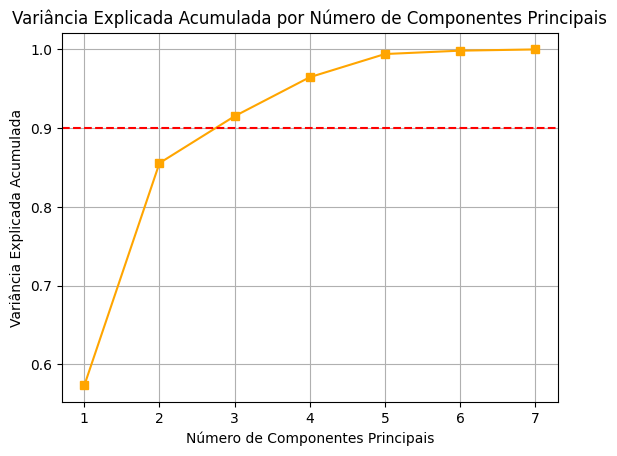

Número de componentes necessárias para explicar 90% da variância: 3

Componentes principais do PCA:
   Temperature         L         R       A_M     Color  Spectral_Class  \
0     0.378024  0.369619  0.236101 -0.425124  0.377019        0.389076   
1    -0.341940  0.253566  0.538874 -0.283152 -0.440155       -0.424414   
2     0.170646  0.857041 -0.163591  0.251327 -0.132940       -0.086682   
3     0.539967 -0.195453  0.688318  0.356219 -0.039406       -0.040198   
4     0.629388 -0.157264 -0.355840 -0.417156 -0.400525       -0.342664   
5     0.150703  0.037404 -0.156448  0.565392  0.135547       -0.373050   
6    -0.025497  0.015277  0.047213 -0.235267  0.682716       -0.634648   

       Type  
0  0.436442  
1  0.272686  
2 -0.348204  
3 -0.257665  
4  0.025670  
5  0.688627  
6 -0.269551  


In [ ]:
# Determinando o número de componentes necessárias para explicar 90% da variância dos dados
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(explained_variance_ratio_cumsum >= 0.9) + 1

# Componentes principais do PCA
components_df = pd.DataFrame(pca.components_[:, :], columns=data.columns[:])

#gráfico do número de componentes necessárias vs. Variância explicada acumulada
pca_data = pca.transform(scaled_data)
plt.plot(np.arange(1, pca.n_components_ + 1), explained_variance_ratio_cumsum, marker='s', linestyle='-', color = 'orange')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% de Variância Explicada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Número de Componentes Principais')
plt.grid(True)
plt.show()


print('========================================================================')
print("Número de componentes necessárias para explicar 90% da variância:", n_components_90)
print('========================================================================')
print("\nComponentes principais do PCA:")
print(components_df)

# **4. Três primeiras componentes principais do PCA**

Dos resultados obtidos anteriormente, podemos analisar as três primeiras componentes principais do PCA.

In [ ]:
top_3_components = components_df.head(3)

print("\nAs três primeiras componentes principais do PCA:")
print(top_3_components)


As três primeiras componentes principais do PCA:
   Temperature         L         R       A_M     Color  Spectral_Class  \
0     0.378024  0.369619  0.236101 -0.425124  0.377019        0.389076   
1    -0.341940  0.253566  0.538874 -0.283152 -0.440155       -0.424414   
2     0.170646  0.857041 -0.163591  0.251327 -0.132940       -0.086682   

       Type  
0  0.436442  
1  0.272686  
2 -0.348204  


Quanto maior o valor absoluto de um coeficiente, mais influente é a variável naquela componente principal.

Dessa forma, para a **Primeira Componente Principal** o **'Type'** é a variável mais importante, seguida pelo Spectral_Class, Temperature e L. R e A_M possuem valores bem mais abaixo.

Para a **Segunda Componente Principal**, vemos que a variável **'R'** é mais importante, seguida por 'Color', 'Spectral_Class', 'Temperature', 'A_M' e 'Type'.

Já para o **Componente Principal 3**, a variável **'L'** é mais significativa que as outras, seguida por 'Type', 'A_M', 'Temperature', 'R', 'Color' e 'Spectral_Class'.


# **5. Método de agrupamento hierárquico**

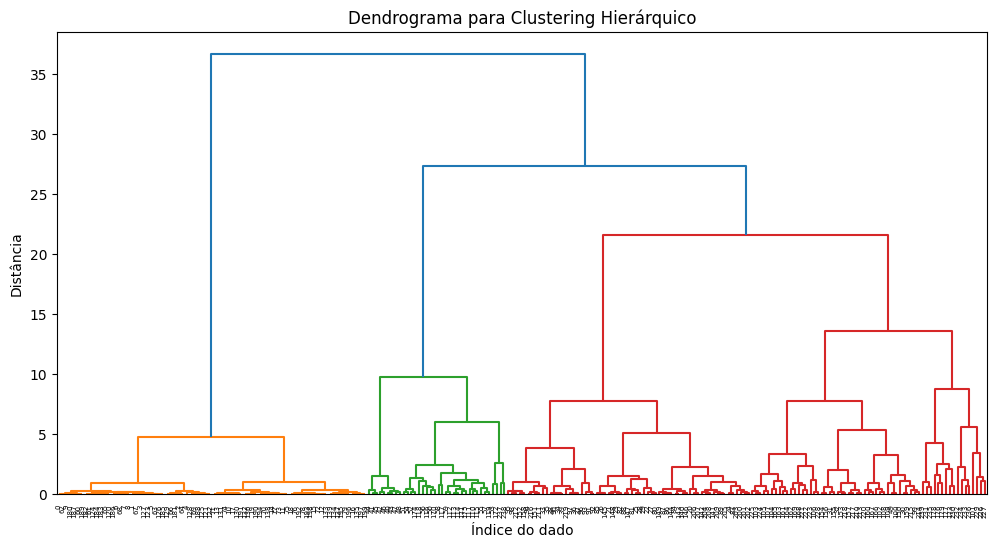

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Vamos usar o método de ligação completo (complete linkage) para calcular as distâncias entre clusters

Z = linkage(pca_data, method='ward', metric="euclidean")


# Plot do dendrograma
plt.figure(figsize=(12, 6))
plt.title('Dendrograma para Clustering Hierárquico')
dendrogram(Z)
plt.xlabel('Índice do dado')
plt.ylabel('Distância')
plt.show()

Existem algumas formas de obter o número ideal de agrupamentos (clusters) para a análise dos dados. Uma delas é **Análise Visual** do Dendrograma, que se resume a procurar quantos "aglomerados" de linhas verticais possuem ao se começar a visualizar uma maior densidade de linhas. Pessoalmente, possuo uma técnica que é: imaginar uma linha horizontal cortando o dendrograma em aproximadamente 25% da altura máxima (eixo y) e verificar quantos "aglomerados" conseguiria tira de lá.

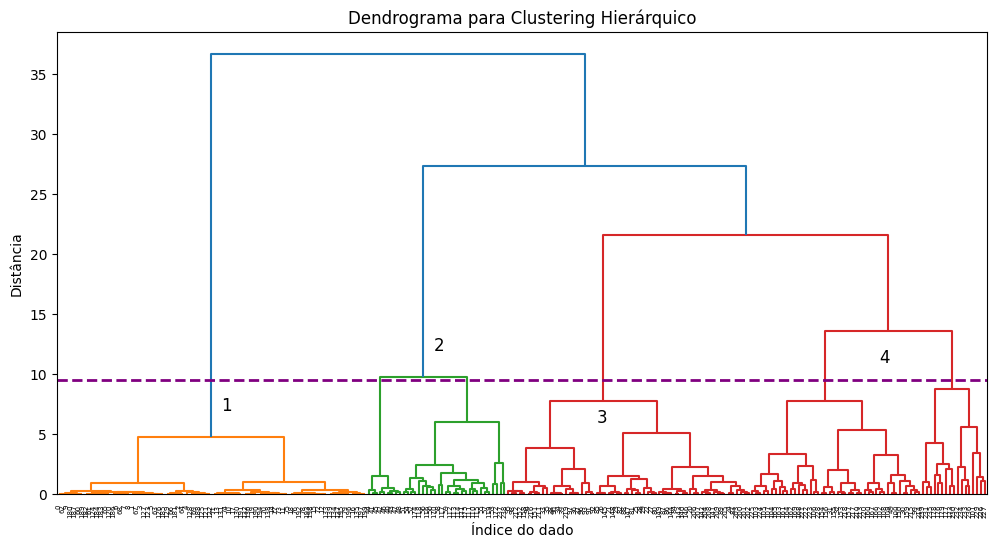

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Vamos usar o método de ligação completo (complete linkage) para calcular as distâncias entre clusters

Z = linkage(pca_data, method='ward', metric="euclidean")


# Plot do dendrograma
plt.figure(figsize=(12, 6))
plt.title('Dendrograma para Clustering Hierárquico')
dendrogram(Z)

plt.axhline(y=9.5, color='purple', linestyle='--', label='~25%', linewidth=2)

# Adicione texto aos pontos de interesse
plt.text(450, 7, '1', color='black', fontsize=12, ha='right')
plt.text(1000, 12, '2', color='black', fontsize=12, ha='right')
plt.text(1420, 6, '3', color='black', fontsize=12, ha='right')
plt.text(2150, 11, '4', color='black', fontsize=12, ha='right')


plt.xlabel('Índice do dado')
plt.ylabel('Distância')
plt.show()

Dessa forma, pelo método de Análise Visual **4 clusters** é o número ideal para a análise dos dados. Entretanto, é bom termos um número ideal de clusters obtido por outro método. No item a seguir, vamos obter utilizando o KMeans.

# **6. Método de agrupamento KMeans**

Esse método busca adicionar cada um dos dados, de forma aleatória a cada core do modelo, fazendo a seleção na tentativa de minimizar a distância entre a instância e o core. Para isso deve-se selecionar previamente um número de clusters.

Então como vamos encontrar o número de clusters ideal? Existem dois métodos que iremos empregar. O primeiro é conhecido por "Cotovelo" e o segundo por "Silhueta".

O **Método do Cotovelo** utiliza o ponto de inflexão do gráfico da Diferença de inertias vs. número de clusters. O atributo **inertia_** do KMeans possibilita somar as distâncias quadradas das amostras ao centro do cluster mais próximo. Isso implica que podemos obter uma medida da dispersão dos pontos dentro de cada cluster e quanto menor o valor da inércia, mais densos e bem definidos serão os clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

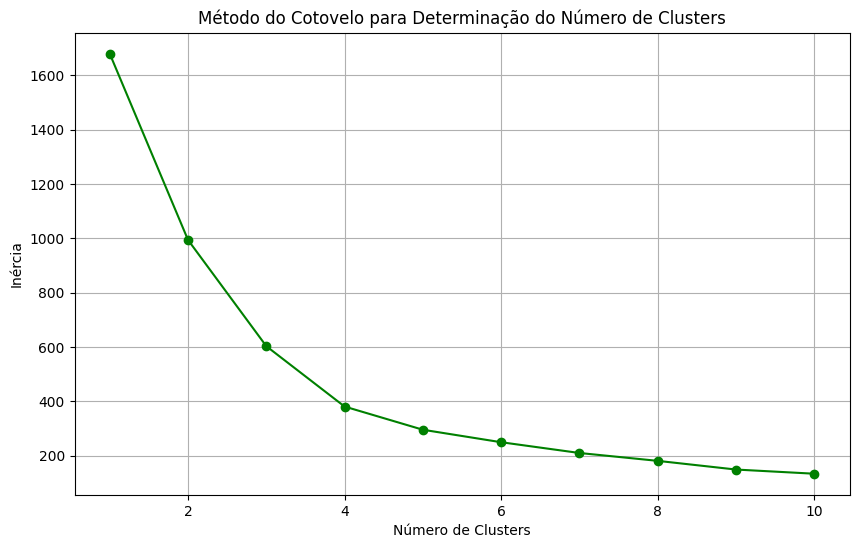

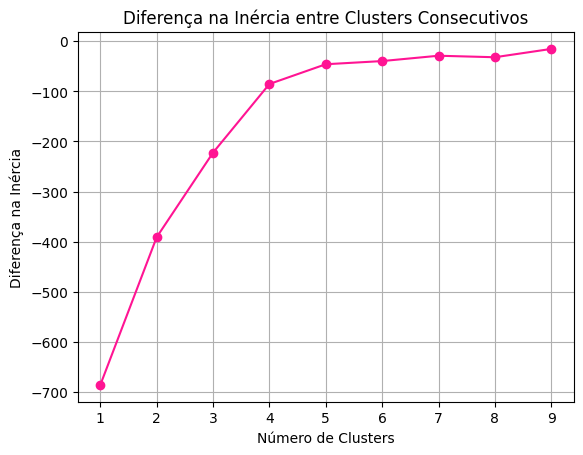

Número ideal de clusters: 5


In [ ]:
#Método do cotovelo

inertia = []

#Salvando as medidas de inertia para cada cluster
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color = 'green')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')
plt.grid(True)
plt.show()

# Identificar o ponto de inflexão no gráfico (Método do Cotovelo)
diff = np.diff(inertia)
plt.plot(range(1, 10), diff, color = 'deeppink', marker = 'o')
plt.title('Diferença na Inércia entre Clusters Consecutivos')
plt.xlabel('Número de Clusters')
plt.ylabel('Diferença na Inércia')
plt.grid(True)
plt.show()

# Identificar o número ideal de clusters
diff2 = diff[1:] - diff[:-1]

from scipy.signal import find_peaks

# Encontrar os picos negativos na curva da diferença na inércia
peaks, _ = find_peaks(-diff2)

# O número ideal de clusters é o primeiro mínimo local na curva da diferença na inércia
optimal_num_clusters = peaks[0] + 1 if peaks.size > 0 else 2

print("Número ideal de clusters:", optimal_num_clusters)



O **Método da Silhueta** utiliza a distância média entre os pontos de um cluster e a distância média até os pontos do cluster mais próximo para a construção de um gráfico. Podemos obter o número ideal de clusters observando o gráfico onde o número de clusters maximiza a média da silhueta, indicado pelo pico mais alto no gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

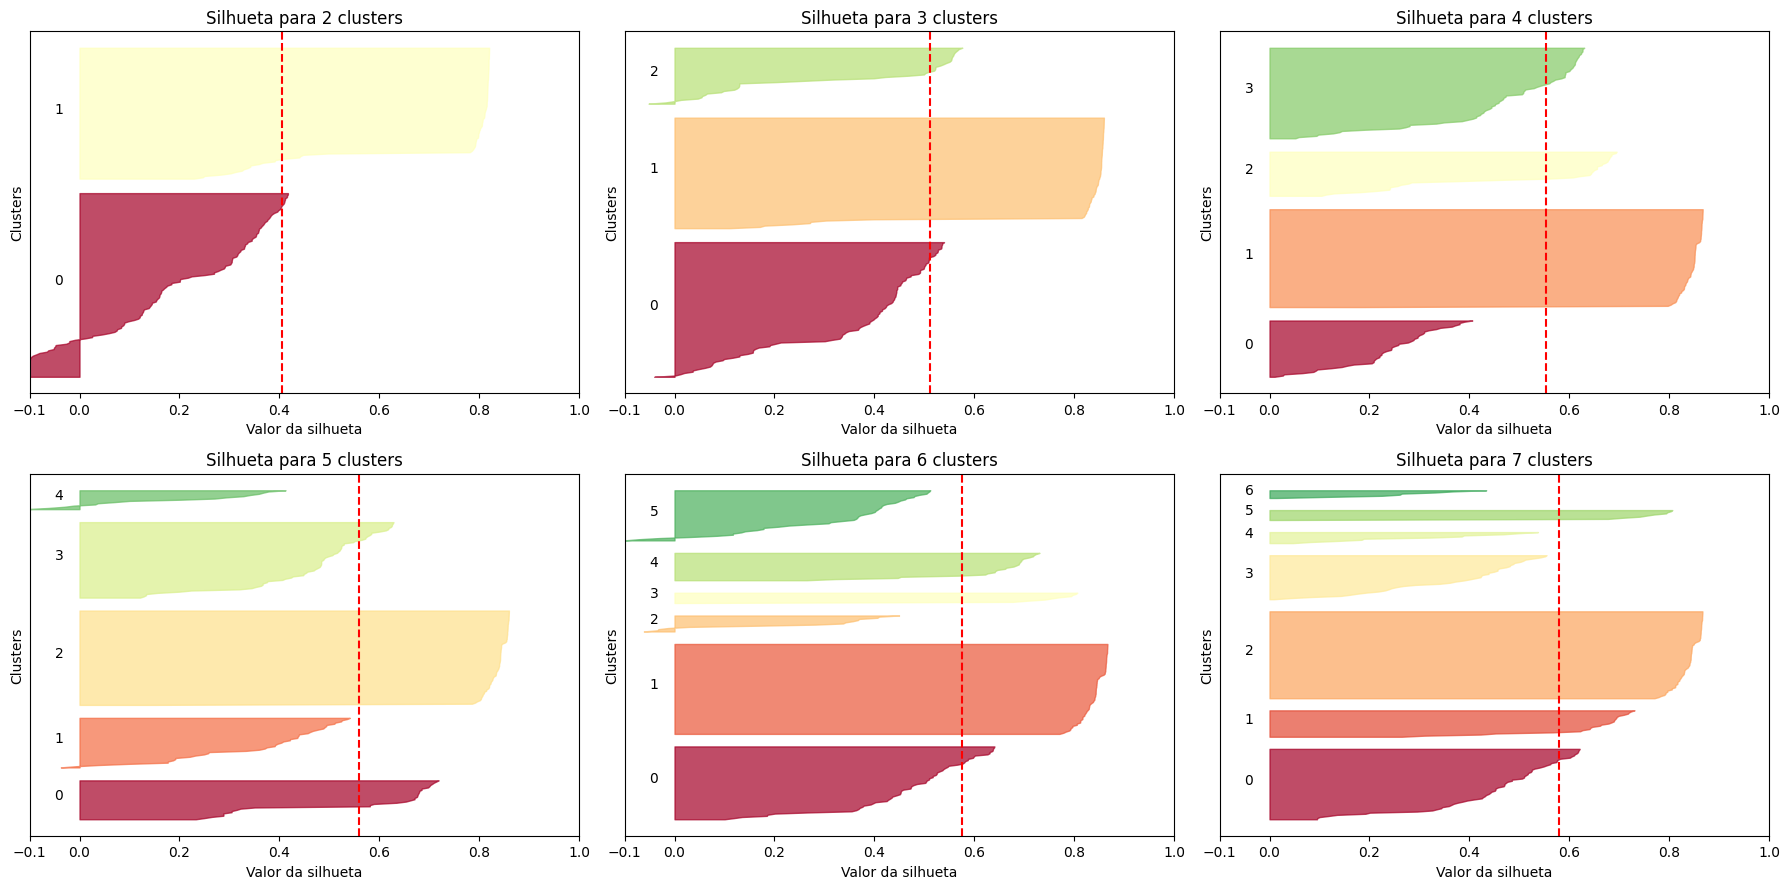

In [ ]:
# Dados
X = pca_data  # Substitua scaled_data pelos seus dados

# Números de clusters que você deseja testar
num_clusters_list = range(2, 8)

# Lista para armazenar os valores médios de silhueta para cada número de clusters
silhouette_avg_list = []

# Tamanho da figura
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

# Loop sobre diferentes números de clusters
for idx, num_clusters in enumerate(num_clusters_list):
    # Cria o modelo KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calcula os valores de silhueta para cada amostra
    silhouette_values = silhouette_samples(X, cluster_labels)

    # Calcula a média dos valores de silhueta para este número de clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

    # Calcula a silhueta de cada amostra e plota
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    ax.set_title(f'Silhueta para {num_clusters} clusters')
    ax.set_xlabel('Valor da silhueta')
    ax.set_ylabel('Clusters')

    y_lower = 10
    for i in range(num_clusters):
        # Agrega os valores de silhueta para amostras pertencentes ao cluster i e os ordena
        cluster_i_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_i_silhouette_values.sort()

        # Calcula o tamanho do cluster i
        size_cluster_i = cluster_i_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Preenche o gráfico com a silhueta de cada amostra
        color = plt.cm.RdYlGn(float(i) / num_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Rotula o gráfico com o número do cluster no meio
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcula a próxima posição y_lower
        y_lower = y_upper + 10

    # Plota a linha vertical para a média da silhueta de todos os clusters
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_xlim(-0.1, 1)

plt.tight_layout()
plt.show()

Como podemos ver nos gráficos da **silhueta**. Os que melhores se aproximam em soma do valor médio da silhueta são os gráficos de cluster **4 e 5**, sendo 5 o número que diminui ligeiramente a diferença ao valor médio de silhueta. Dessa forma, podemos considerar **5** como um número ideal de clusters para esse método do KMeans.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


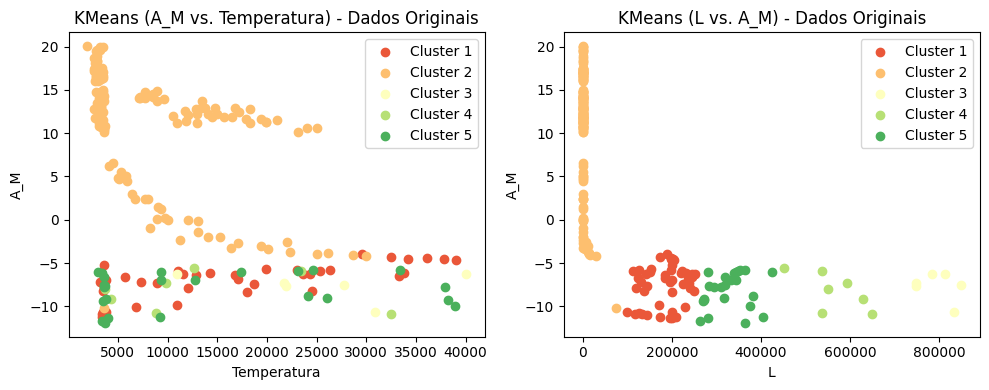

In [ ]:
# Criando o modelo KMeans com 5 clusters para os dados originais
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

# Prevendo os clusters para os dados de entrada
clusters_data = kmeans.predict(data)

# Definindo uma paleta de cores para os clusters
palette = sns.color_palette('RdYlGn', 5)

# Vimos que "Type", "Temperatura", "L" e "A_M" sejam as colunas relevantes dos seus dados originais
Type_data = data['Type']
Temperatura_data = data['Temperature']
L_data = data['L']
A_M_data = data['A_M']

# Plotando o gráfico para "Type" vs. "Temperatura" com os dados originais
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for i, cluster in enumerate(set(clusters_data)):
    plt.scatter(Temperatura_data[clusters_data == cluster], A_M_data[clusters_data == cluster], c=[palette[i]], label=f'Cluster {cluster+1}')
plt.ylabel('A_M')
plt.xlabel('Temperatura')
plt.title('KMeans (A_M vs. Temperatura) - Dados Originais')
plt.legend()

# Plotando o gráfico para "L" vs. "A_M" com os dados originais
plt.subplot(1, 2, 2)
for i, cluster in enumerate(set(clusters_data)):
    plt.scatter(L_data[clusters_data == cluster], A_M_data[clusters_data == cluster], c=[palette[i]], label=f'Cluster {cluster+1}')
plt.xlabel('L')
plt.ylabel('A_M')
plt.title('KMeans (L vs. A_M) - Dados Originais')
plt.legend()

plt.tight_layout()
plt.show()

Repetindo a clusterização gráfica para os dados obtidos pelo PCA para as componentes principais 1 e 2:![download ()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


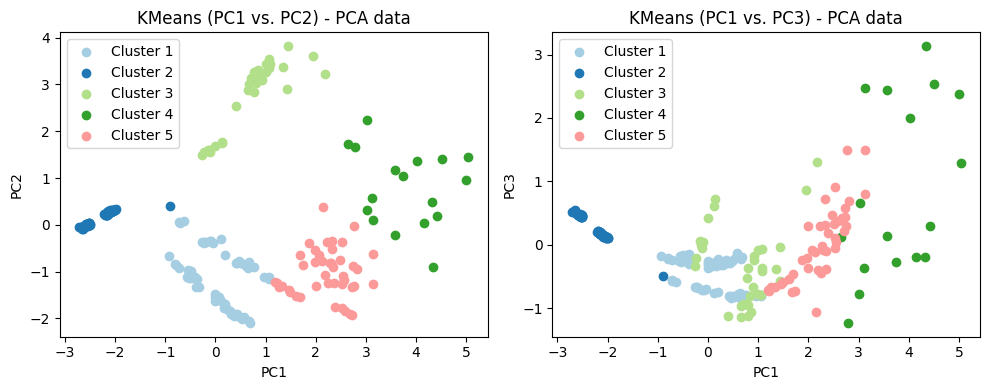

In [ ]:
# Criando o modelo KMeans com 5 clusters para os dados PCA
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(pca_data)

# Prevendo os clusters para os dados de entrada no espaço do PCA
clusters_pca = kmeans_pca.predict(pca_data)

# Definindo uma paleta de cores para os clusters
palette = sns.color_palette('Paired', 5)

# Plot PC1 vs PC2
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for i, cluster in enumerate(set(clusters_pca)):
    plt.scatter(pca_data[:, 0][clusters_pca == cluster], pca_data[:, 1][clusters_pca == cluster], c=[palette[i]], label=f'Cluster {cluster+1}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans (PC1 vs. PC2) - PCA data')
plt.legend(loc='upper left')

# Plot PC1 vs PC3
plt.subplot(1, 2, 2)
for i, cluster in enumerate(set(clusters_pca)):
    plt.scatter(pca_data[:, 0][clusters_pca == cluster], pca_data[:, 2][clusters_pca == cluster], c=[palette[i]], label=f'Cluster {cluster+1}')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('KMeans (PC1 vs. PC3) - PCA data')
plt.legend()

plt.tight_layout()
plt.show()

# **7. Método de agrupamento DBSCAN**

No método DBSCAN, o número de agrupamentos pode ser determinado com base nos parâmetros epsilon (raio da vizinhança) e min_samples (número mínimo de pontos em uma vizinhança para ser considerado um cluster). O DBSCAN também é capaz de identificar os outliers, pontos que não pertencem a nenhum agrupamento.

Vamos ajustar os valores de epsilon e min_samples para avaliar o resultado.

In [ ]:
# Variáveis
epsilon = 1.  # Parâmetro epsilon
min_samples = 4  # Número mínimo de amostras em uma vizinhança para ser considerado um core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

# Ajustar o modelo aos dados
dbscan.fit(X)

# Identificar os grupos e os outliers
categorias = dbscan.labels_
outliers = (categorias == -1).sum()
n_agrupamentos = len(set(categorias)) - (1 if -1 in categorias else 0)

# Print do número de agrupamentos e comentário sobre a presença de outliers
print(f"Número de clusters obtido: {n_agrupamentos}")
print(f"Número de outliers: {outliers}")


Número de clusters obtido: 5
Número de outliers: 20


Dessa forma, podemos visualizar os dados utilizando o número de cluster igual a 5. Veja os gráficos abaixo.

<ipython-input-71-240eb9c96c1a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[categorias == cluster, 0], X[categorias == cluster, 1], c=palette[i], label=f'Cluster {cluster+1}')


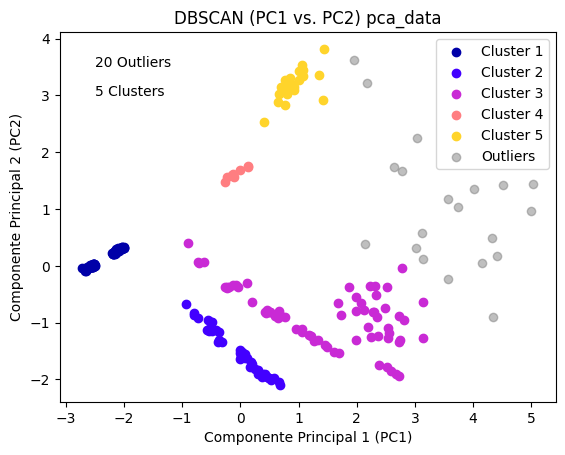

In [ ]:
#Paleta de cores para os clusters
palette = sns.color_palette('gnuplot2', n_agrupamentos)

# Plot de dispersão para L vs. A_M
#plt.figure(figsize=(10, 6))
for i, cluster in enumerate(set(categorias)):
    if cluster == -1:
        plt.scatter(X[categorias == cluster, 0], X[categorias == cluster, 1], c='gray', label='Outliers', alpha=0.5)
    else:
        plt.scatter(X[categorias == cluster, 0], X[categorias == cluster, 1], c=palette[i], label=f'Cluster {cluster+1}')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('DBSCAN (PC1 vs. PC2) pca_data')
plt.legend()
plt.text(-2.5, 3.5, f'{outliers} Outliers')
plt.text(-2.5, 3, f'{n_agrupamentos} Clusters')
plt.show()

Repetindo procedimento para os dados originais:

<ipython-input-72-9ad7658fd5c3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data.loc[categorias == cluster, 'Temperature'], data.loc[categorias == cluster, 'A_M'], c=palette[i], label=f'Cluster {cluster+1}')


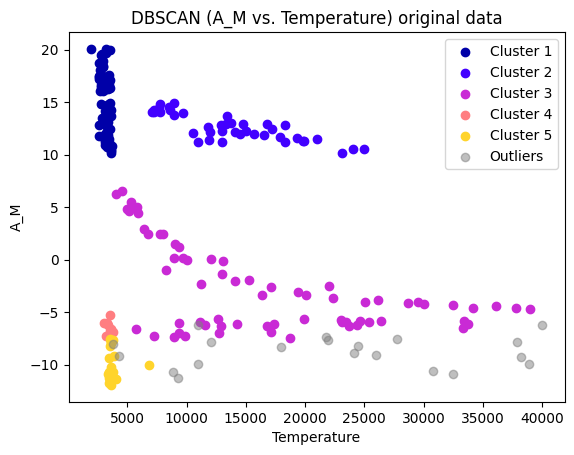

In [ ]:
#Paleta de cores para os clusters
palette = sns.color_palette('gnuplot2', n_agrupamentos)

#Plot de dispersão para L vs. A_M
#plt.figure(figsize=(10, 6))
for i, cluster in enumerate(set(categorias)):
    if cluster == -1:
        plt.scatter(data.loc[categorias == cluster, 'Temperature'], data.loc[categorias == cluster, 'A_M'], c='gray', label='Outliers', alpha=0.5)
    else:
        plt.scatter(data.loc[categorias == cluster, 'Temperature'], data.loc[categorias == cluster, 'A_M'], c=palette[i], label=f'Cluster {cluster+1}')
plt.xlabel('Temperature')
plt.ylabel('A_M')
plt.title('DBSCAN (A_M vs. Temperature) original data')
plt.legend()
#plt.text(400000, 17, f'{outliers} Outliers')
#plt.text(400000, 15, f'{n_agrupamentos} Clusters')
plt.show()

# **8 . Faça uma análise sobre a performance geral dos algoritmos utilizados nos itens de 5 a 7.**

Comparando o plot da 'A_M' vs. 'Temperatura' colorido usando 'Type' do início deste documento, percebe-se que dentre os modelos utilizados, o que mais se aproxima de uma boa distribuição visual de aglomerados sabendo-se da natureza dos dados é o **DBSCAN**. O que pode ser visualizado ao comparar-se os plots. Entretanto, vemos que o ideal para nossos dados deveria ser 6 clusters e não somente 5. Porém foi uma excelente aproximação dados as limitações de cada modelo.

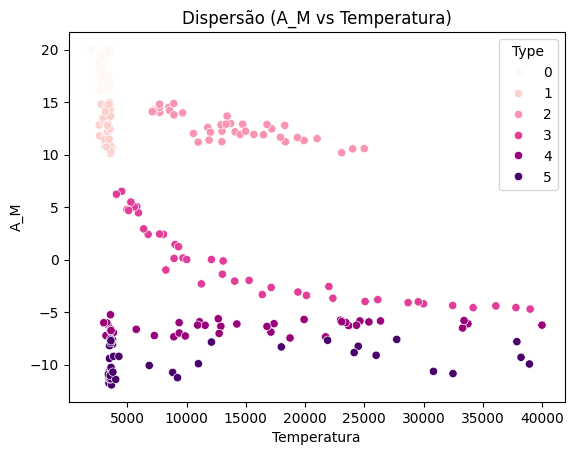
